In [1]:
pip install tensorflow matplotlib

     -------------------------------------- 331.7/331.7 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 6.9 MB/s eta 0:00:00
     -------------------------------------- 210.7/210.7 kB 6.3 MB/s eta 0:00:00
     -------------------------------------- 135.8/135.8 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 60.4/60.4 kB ? eta 0:00:00
     ---------------------------------------- 12.9/12.9 MB 6.8 MB/s eta 0:00:00
     -------------------------------------- 436.9/436.9 kB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB ? e

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 25.3
[notice] To upd

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
X_train=np.loadtxt('input.csv',delimiter=',')
Y_train=np.loadtxt('labels.csv',delimiter=',')

X_test=np.loadtxt('input_test.csv',delimiter=',')
Y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [5]:
print("Shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of Y_test",Y_test.shape)

Shape of X_train (2000, 30000)
Shape of Y_train (2000,)
Shape of X_test (400, 30000)
Shape of Y_test (400,)


In [6]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

X_train=X_train/255
X_test=X_test/255

In [7]:
print("Shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of Y_test",Y_test.shape)

Shape of X_train (2000, 100, 100, 3)
Shape of Y_train (2000, 1)
Shape of X_test (400, 100, 100, 3)
Shape of Y_test (400, 1)


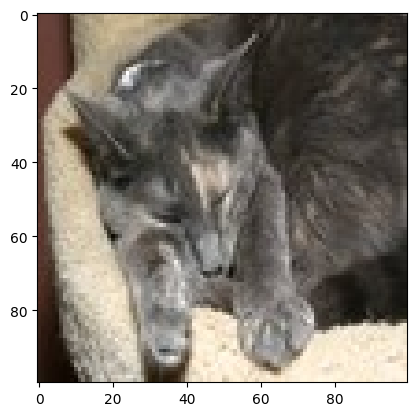

In [8]:
import random
import matplotlib.pyplot as plt
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [9]:
model=Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1,activation='sigmoid')
])

c:\Users\likhitha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4980 - loss: 0.7847
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5100 - loss: 0.6907
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5860 - loss: 0.6744
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.6660 - loss: 0.6274
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.6860 - loss: 0.5959


In [12]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6875 - loss: 0.6036


[0.6036064028739929, 0.6875]

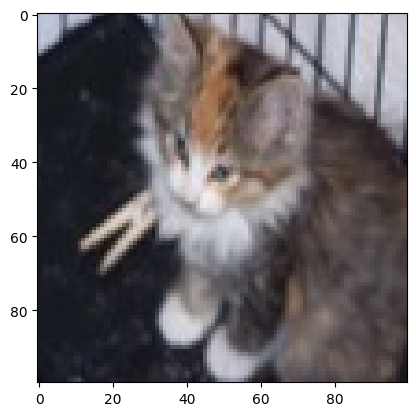

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Our model says is is a: cat


In [13]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5

if(y_pred==0):
    pred="dog"
else:
    pred="cat"

print("Our model says is is a:", pred)